# Análise exploratória dos dados das medições 

## Inicialização

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\guilh\AppData\Local\Temp\ipykernel_12056\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Diretoria onde os dados estão localizados
dir_files = './03-dados-qualar-longo-corrigido/'

In [3]:
# Ficheiro das medições 
ficheiro_medicoes = dir_files + '03-medicoes-longo-AML.csv' # Possibilidade de u

In [4]:
medicoes = pd.read_csv(ficheiro_medicoes, thousands=',', index_col=0, parse_dates=True)
medicoes

,estacao,poluente,valor
index,,,
2001-01-01 00:00:00,Alfragide/Amadora,SO2,2.9
2001-01-01 01:00:00,Alfragide/Amadora,SO2,2.9
2001-01-01 02:00:00,Alfragide/Amadora,SO2,5.6
2001-01-01 03:00:00,Alfragide/Amadora,SO2,5.6
2001-01-01 04:00:00,Alfragide/Amadora,SO2,5.6
...,...,...,...
2022-12-31 19:00:00,Paio Pires,PM2.5,8.8
2022-12-31 20:00:00,Paio Pires,PM2.5,10.5
2022-12-31 21:00:00,Paio Pires,PM2.5,9.1


## Avaliar, para cada um dos poluentes, se a distribuição dos valores das medições varia ou não, entre estações.

In [5]:
# Projetar dataframe de forma facilitar a visualização
pivot_estacoes_df = medicoes.pivot_table(values='valor', index=medicoes.index, columns=['estacao', 'poluente'])
pivot_estacoes_df

estacao             Alfragide/Amadora                       Alto Seixalinho  \
poluente                          NO2    O3 PM10 PM2.5  SO2             NO2   
index                                                                         
2001-01-01 00:00:00              11.7  70.1  NaN   NaN  2.9             NaN   
2001-01-01 01:00:00              11.7  68.1  NaN   NaN  2.9             NaN   
2001-01-01 02:00:00               9.8  70.1  NaN   NaN  5.6             NaN   
2001-01-01 03:00:00               9.8  70.1  NaN   NaN  5.6             NaN   
2001-01-01 04:00:00               9.8  68.1  NaN   NaN  5.6             NaN   
...                               ...   ...  ...   ...  ...             ...   
2022-12-31 19:00:00               9.8   NaN  NaN   NaN  NaN             NaN   
2022-12-31 20:00:00               9.8   NaN  NaN   NaN  NaN             NaN   
2022-12-31 21:00:00               7.5   NaN  NaN   NaN  NaN             NaN   
2022-12-31 22:00:00               6.7   NaN  NaN   NaN  NaN             NaN   
2022-12-31 23:00:00               4.8   NaN  NaN   NaN  NaN             NaN   

estacao                          Alverca  ... Reboleira                  \
poluente             O3 PM10 SO2     NO2  ...       NO2    O3  PM10 SO2   
index                                     ...                             
2001-01-01 00:00:00 NaN  NaN NaN     NaN  ...       NaN   NaN   NaN NaN   
2001-01-01 01:00:00 NaN  NaN NaN     NaN  ...       NaN   NaN   NaN NaN   
2001-01-01 02:00:00 NaN  NaN NaN     NaN  ...       NaN   NaN   NaN NaN   
2001-01-01 03:00:00 NaN  NaN NaN     NaN  ...       NaN   NaN   NaN NaN   
2001-01-01 04:00:00 NaN  NaN NaN     NaN  ...       NaN   NaN   NaN NaN   
...                  ..  ...  ..     ...  ...       ...   ...   ...  ..   
2022-12-31 19:00:00 NaN  NaN NaN    16.1  ...      16.0  67.0  32.1 NaN   
2022-12-31 20:00:00 NaN  NaN NaN    14.0  ...      11.3  69.0  32.1 NaN   
2022-12-31 21:00:00 NaN  NaN NaN    10.2  ...       9.6  71.0  30.1 NaN   
2022-12-31 22:00:00 NaN  NaN NaN     8.3  ...       8.4  69.0  30.2 NaN   
2022-12-31 23:00:00 NaN  NaN NaN     7.0  ...       6.4  70.0  34.3 NaN   

estacao             Restelo            Santa Cruz de Benfica            
poluente                NO2    O3 PM10                   NO2  PM10 SO2  
index                                                                   
2001-01-01 00:00:00     NaN   NaN  NaN                   NaN   NaN NaN  
2001-01-01 01:00:00     NaN   NaN  NaN                   NaN   NaN NaN  
2001-01-01 02:00:00     NaN   NaN  NaN                   NaN   NaN NaN  
2001-01-01 03:00:00     NaN   NaN  NaN                   NaN   NaN NaN  
2001-01-01 04:00:00     NaN   NaN  NaN                   NaN   NaN NaN  
...                     ...   ...  ...                   ...   ...  ..  
2022-12-31 19:00:00     4.8  82.0  NaN                  19.7  28.5 NaN  
2022-12-31 20:00:00     7.1  78.0  NaN                  19.3  28.8 NaN  
2022-12-31 21:00:00     7.2  78.0  NaN                  16.8  29.6 NaN  
2022-12-31 22:00:00     5.9  77.0  NaN                  16.0  29.8 NaN  
2022-12-31 23:00:00     3.1  79.0  NaN                  12.6  29.2 NaN  

[192840 rows x 86 columns]

In [6]:
# Criar lista de poluentes
poluentes=list(set(medicoes['poluente']))
poluentes

['PM2.5', 'SO2', 'O3', 'NO2', 'PM10']

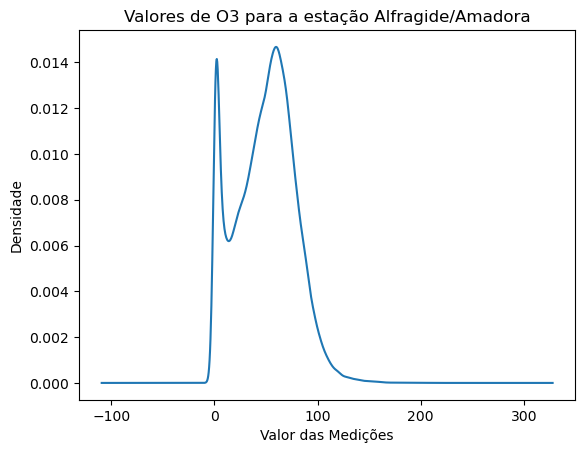

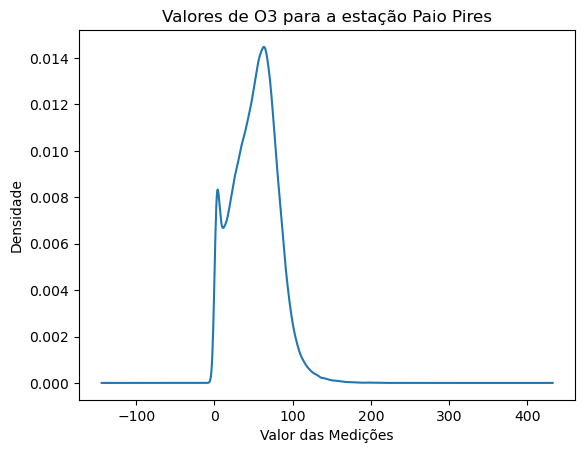

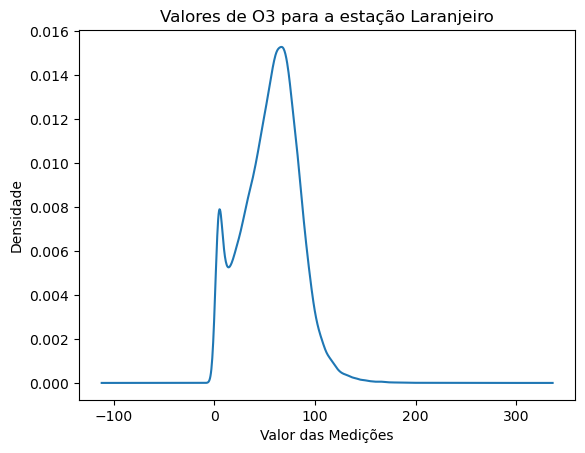

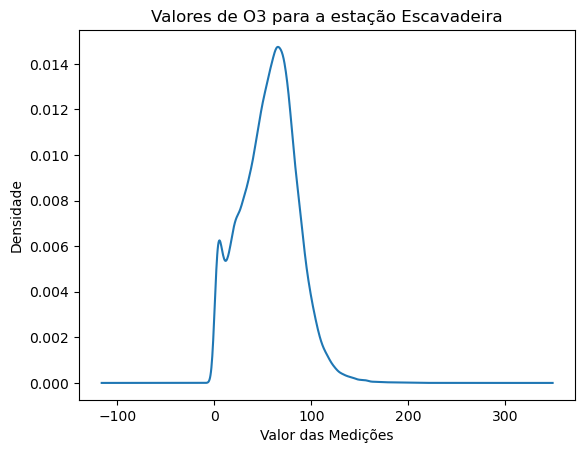

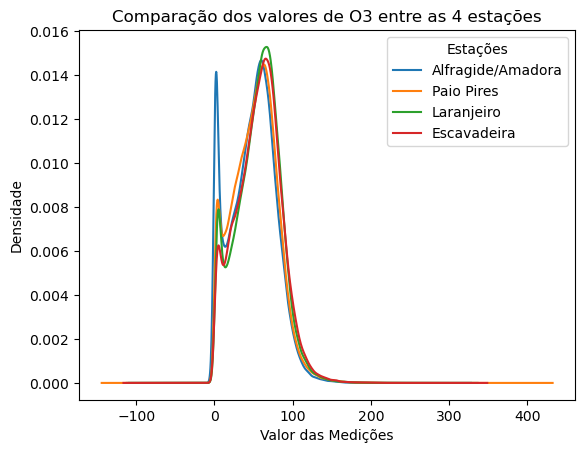

In [7]:
# KDE (ou histograma) dos valores das medições para um poluente, para comparar a distribuição das medições entre um subconjunto de estações
estações=['Alfragide/Amadora', 'Paio Pires', 'Laranjeiro', 'Escavadeira'] #estações que escolhemos para observar
poluente='O3'#poluente escolhido
filtro_O3= medicoes[medicoes['poluente']== poluente] #ficar só com o O3 como poluente
#construção de um gráfico para cada estação
for dados in estações:
    estação = filtro_O3[filtro_O3['estacao'] == dados]['valor']
    plt.figure()
    estação.plot(kind='kde', title=f'Valores de O3 para a estação {dados}')
    plt.xlabel('Valor das Medições')
    plt.ylabel('Densidade')
    plt.show()
#construcão de um gráfico com os dados de todas as estações escolhidas
for dados in estações:
    estação = filtro_O3[filtro_O3['estacao'] == dados]['valor']
    estação.plot(kind='kde', title='Comparação dos valores de O3 entre as 4 estações', label=dados)   
    plt.xlabel('Valor das Medições')
    plt.ylabel('Densidade')
    plt.legend(title='Estações')

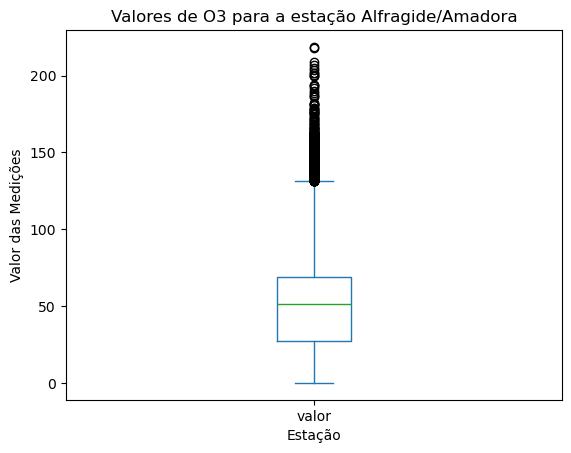

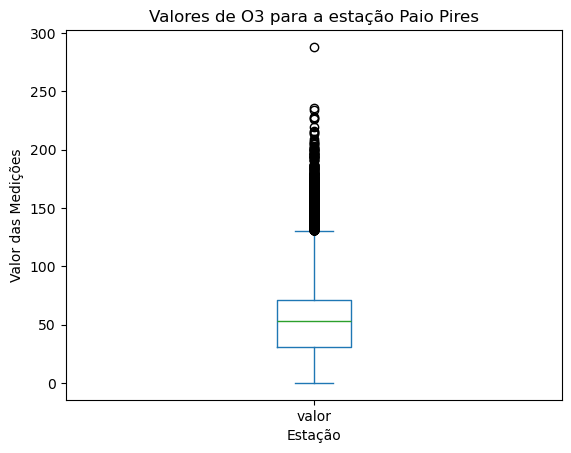

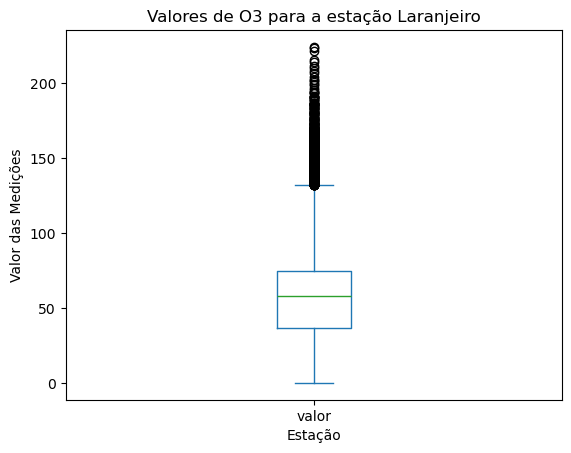

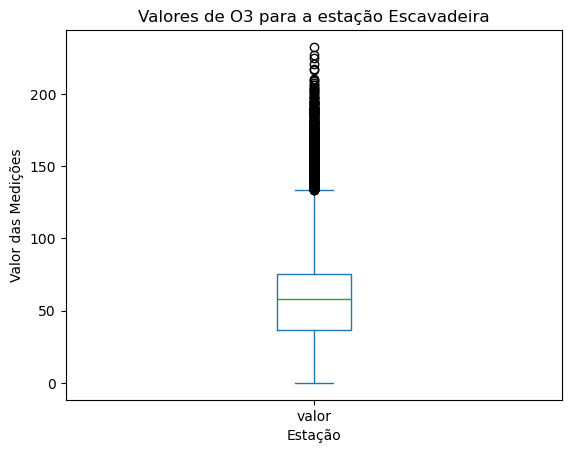

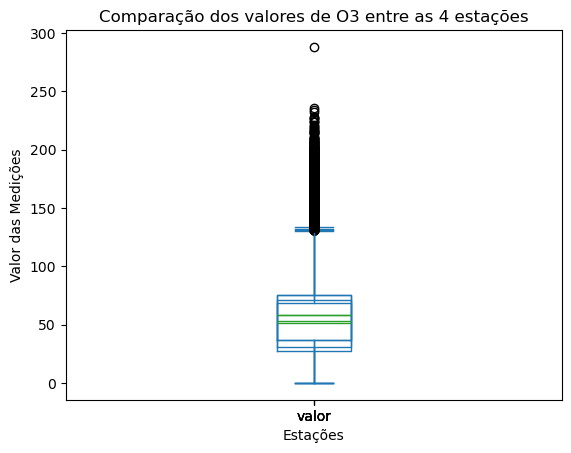

In [8]:
# Box Plot dos valores das medições para um poluente, para comparar a distribuição das medições entre um subconjunto de estações 
estações=['Alfragide/Amadora', 'Paio Pires', 'Laranjeiro', 'Escavadeira']
poluente='O3'
filtro_O3= medicoes[medicoes['poluente']== poluente]
for dados in estações:
    estação = filtro_O3[filtro_O3['estacao'] == dados]['valor']
    plt.figure()
    estação.plot(kind='box', title=f'Valores de O3 para a estação {dados}')
    plt.xlabel('Estação')
    plt.ylabel('Valor das Medições')
    plt.show()

for dados in estações:
    estação = filtro_O3[filtro_O3['estacao'] == dados]['valor']
    estação.plot(kind='box', title='Comparação dos valores de O3 entre as 4 estações')    
    plt.xlabel('Estações')
    plt.ylabel('Valor das Medições')
    

## Avaliar, para cada um dos poluentes, se a distribuição dos valores das medições varia ou não, ao longo dos anos

In [9]:
# Adicionar colunas com informação de ano e decada
medicoes['Ano']=medicoes.index.year
medicoes['Decada'] = (medicoes['Ano'] // 10) * 10

In [10]:
# Projetar dataframe de forma facilitar a visualização
pivot_ano_df = medicoes.pivot_table(values='valor', index=medicoes.index, columns=['Decada','Ano','estacao', 'poluente'])
pivot_ano_df

Decada                           2000                                        \
Ano                              2001                                         
estacao             Alfragide/Amadora                  Avenida da Liberdade   
poluente                          NO2    O3 PM2.5  SO2                  NO2   
index                                                                         
2001-01-01 00:00:00              11.7  70.1   NaN  2.9                 16.5   
2001-01-01 01:00:00              11.7  68.1   NaN  2.9                 18.8   
2001-01-01 02:00:00               9.8  70.1   NaN  5.6                 16.3   
2001-01-01 03:00:00               9.8  70.1   NaN  5.6                 16.0   
2001-01-01 04:00:00               9.8  68.1   NaN  5.6                 14.8   
...                               ...   ...   ...  ...                  ...   
2022-12-31 19:00:00               NaN   NaN   NaN  NaN                  NaN   
2022-12-31 20:00:00               NaN   NaN   NaN  NaN                  NaN   
2022-12-31 21:00:00               NaN   NaN   NaN  NaN                  NaN   
2022-12-31 22:00:00               NaN   NaN   NaN  NaN                  NaN   
2022-12-31 23:00:00               NaN   NaN   NaN  NaN                  NaN   

Decada                                              ...              2020  \
Ano                                                 ...              2022   
estacao                   Beato            Benfica  ... Quinta do Marquês   
poluente             PM10   NO2    O3  SO2     NO2  ...               NO2   
index                                               ...                     
2001-01-01 00:00:00  32.0   3.3  67.3  0.7     5.8  ...               NaN   
2001-01-01 01:00:00  10.8   5.0  64.5  1.0     9.0  ...               NaN   
2001-01-01 02:00:00   7.0   2.8  66.5  1.3     3.5  ...               NaN   
2001-01-01 03:00:00  28.0   1.8  66.0  1.8     3.3  ...               NaN   
2001-01-01 04:00:00   8.8   2.8  63.5  0.0     3.8  ...               NaN   
...                   ...   ...   ...  ...     ...  ...               ...   
2022-12-31 19:00:00   NaN   NaN   NaN  NaN     NaN  ...               5.4   
2022-12-31 20:00:00   NaN   NaN   NaN  NaN     NaN  ...               3.0   
2022-12-31 21:00:00   NaN   NaN   NaN  NaN     NaN  ...               3.1   
2022-12-31 22:00:00   NaN   NaN   NaN  NaN     NaN  ...               3.8   
2022-12-31 23:00:00   NaN   NaN   NaN  NaN     NaN  ...               2.5   

Decada                                                               \
Ano                                                                   
estacao                         Reboleira             Restelo         
poluente               O3  PM10       NO2    O3  PM10     NO2    O3   
index                                                                 
2001-01-01 00:00:00   NaN   NaN       NaN   NaN   NaN     NaN   NaN   
2001-01-01 01:00:00   NaN   NaN       NaN   NaN   NaN     NaN   NaN   
2001-01-01 02:00:00   NaN   NaN       NaN   NaN   NaN     NaN   NaN   
2001-01-01 03:00:00   NaN   NaN       NaN   NaN   NaN     NaN   NaN   
2001-01-01 04:00:00   NaN   NaN       NaN   NaN   NaN     NaN   NaN   
...                   ...   ...       ...   ...   ...     ...   ...   
2022-12-31 19:00:00  78.0  32.9      16.0  67.0  32.1     4.8  82.0   
2022-12-31 20:00:00  80.0  31.6      11.3  69.0  32.1     7.1  78.0   
2022-12-31 21:00:00  78.0  30.4       9.6  71.0  30.1     7.2  78.0   
2022-12-31 22:00:00  74.0  32.1       8.4  69.0  30.2     5.9  77.0   
2022-12-31 23:00:00  76.0  33.8       6.4  70.0  34.3     3.1  79.0   

Decada                                           
Ano                                              
estacao             Santa Cruz de Benfica        
poluente                              NO2  PM10  
index                                            
2001-01-01 00:00:00                   NaN   NaN  
2001-01-01 01:00:00                   NaN   NaN  
2001-01-01 02:0

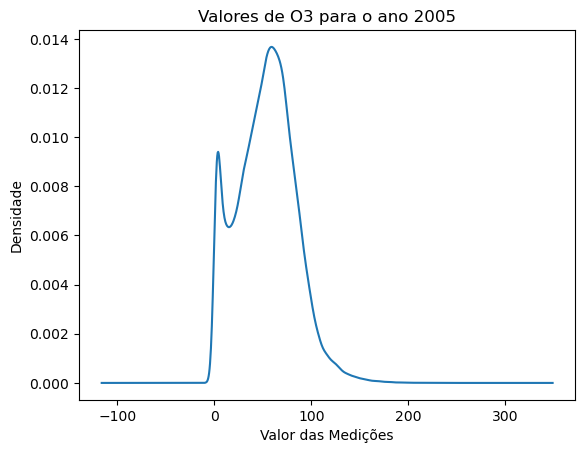

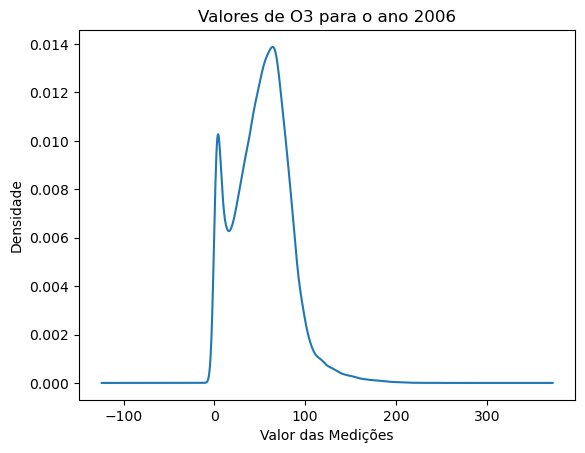

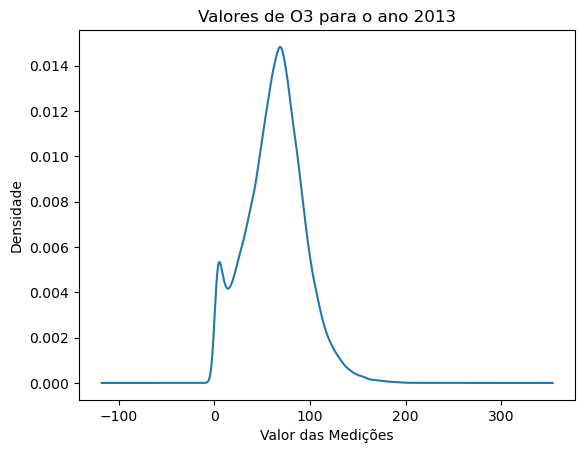

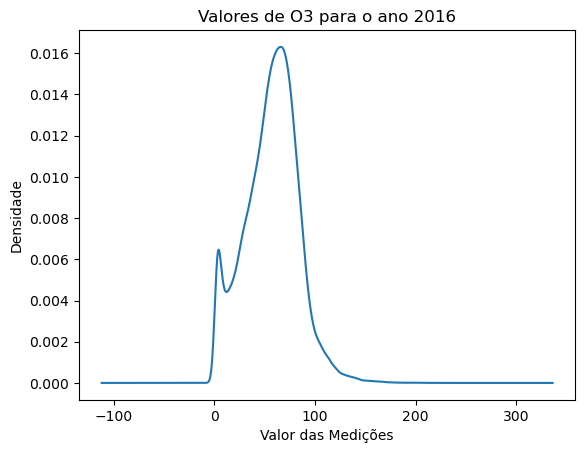

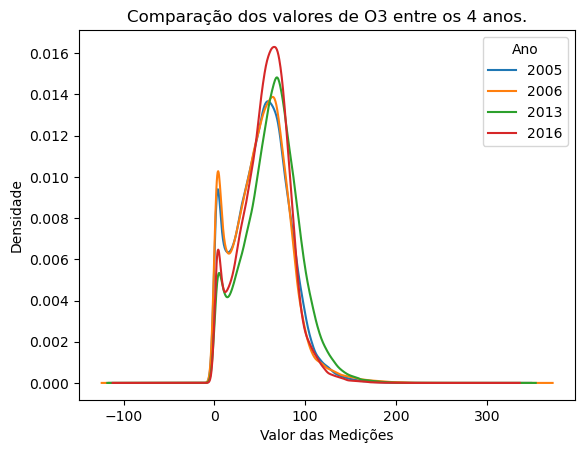

In [11]:
# KDE (ou histograma) dos valores das medições para um poluente, para comparar a distribuição das medições ao longo dos vários anos 
anos=[2005, 2006, 2013, 2016] #anos escolhidos
poluente='O3' # poluente escolhido
#filtrar o dataframe para ficar só com os dados desejados
filtro_poluente = medicoes[medicoes['poluente'] == poluente].copy()
filtro_poluente = filtro_poluente.drop(['poluente', 'Decada', 'estacao'], axis=1)
filtro_poluente=filtro_poluente.copy()
#criação de um gráfico para cada ano
for ano in anos:
    Ano = filtro_poluente[filtro_poluente['Ano'] == ano]['valor']
    plt.figure()
    Ano.plot(kind='kde', title=f'Valores de O3 para o ano {ano}')
    plt.xlabel('Valor das Medições')
    plt.ylabel('Densidade')
    plt.show()
#criação de um gráfico com todos os anos
for ano in anos:
    Ano = filtro_poluente[filtro_poluente['Ano'] == ano]['valor']
    Ano.plot(kind='kde', title='Comparação dos valores de O3 entre os 4 anos.', label=ano)    
    plt.xlabel('Valor das Medições')
    plt.ylabel('Densidade')
    plt.legend(title='Ano')

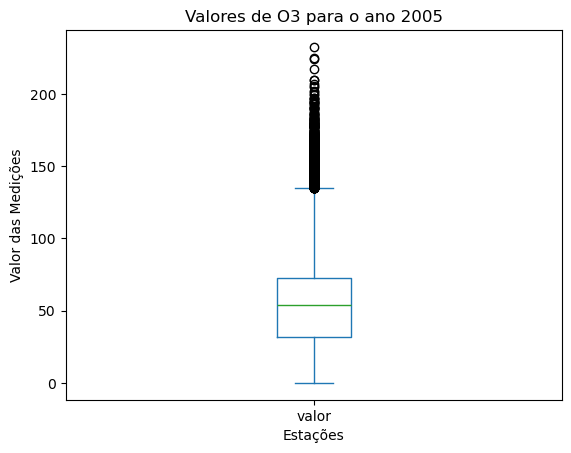

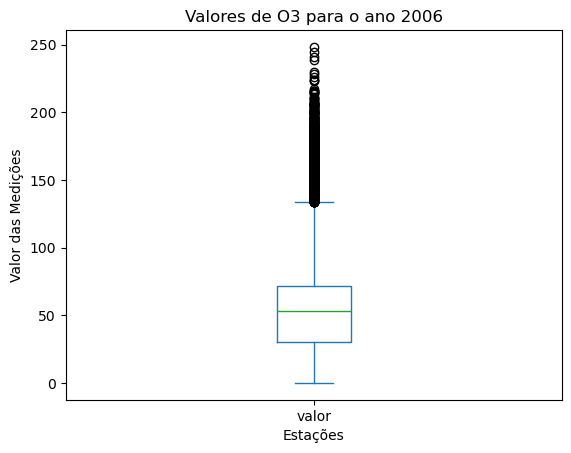

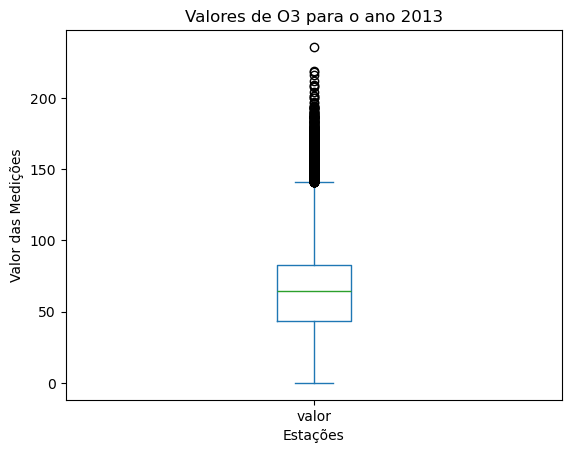

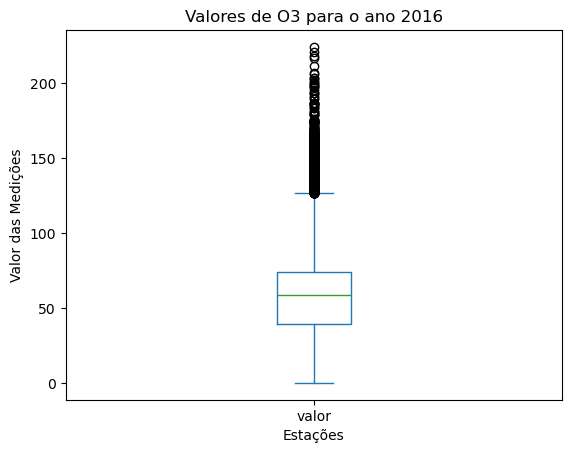

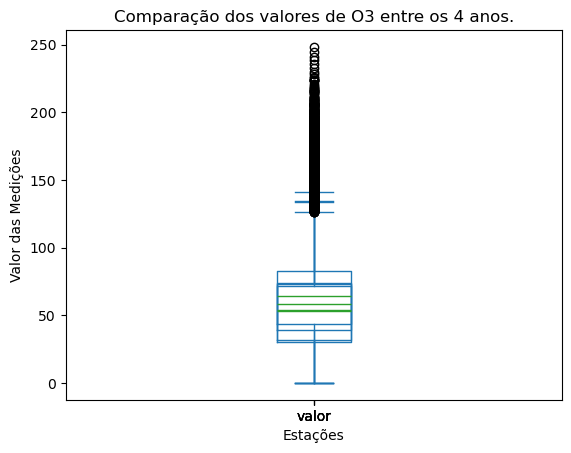

In [12]:
# Box Plot dos valores das medições para um poluente, para comparar a distribuição das medições ao longo dos vários anos
anos=[2005, 2006, 2013, 2016]
poluente='O3'
filtro_poluente = medicoes[medicoes['poluente'] == poluente].copy()
filtro_poluente = filtro_poluente.drop(['poluente', 'Decada', 'estacao'], axis=1)
filtro_poluente=filtro_poluente.copy()

for ano in anos:
    Ano = filtro_poluente[filtro_poluente['Ano'] == ano]['valor']
    plt.figure()
    Ano.plot(kind='box', title=f'Valores de O3 para o ano {ano}')
    plt.xlabel('Estações')
    plt.ylabel('Valor das Medições')
    plt.show()

for ano in anos:
    Ano = filtro_poluente[filtro_poluente['Ano'] == ano]['valor']
    Ano.plot(kind='box', title='Comparação dos valores de O3 entre os 4 anos.')    
    plt.xlabel('Estações')
    plt.ylabel('Valor das Medições')


## Agora vamos analizar a evolução ao longo das décadas

In [13]:
# Projetar dataframe de forma facilitar a visualização
medicoes

,estacao,poluente,valor,Ano,Decada
index,,,,,
2001-01-01 00:00:00,Alfragide/Amadora,SO2,2.9,2001,2000
2001-01-01 01:00:00,Alfragide/Amadora,SO2,2.9,2001,2000
2001-01-01 02:00:00,Alfragide/Amadora,SO2,5.6,2001,2000
2001-01-01 03:00:00,Alfragide/Amadora,SO2,5.6,2001,2000
2001-01-01 04:00:00,Alfragide/Amadora,SO2,5.6,2001,2000
...,...,...,...,...,...
2022-12-31 19:00:00,Paio Pires,PM2.5,8.8,2022,2020
2022-12-31 20:00:00,Paio Pires,PM2.5,10.5,2022,2020
2022-12-31 21:00:00,Paio Pires,PM2.5,9.1,2022,2020


In [14]:
# Criar lista de estações
estações=list(set(medicoes['estacao']))
estações

['Cascais-Mercado',
 'Laranjeiro',
 'Câmara Municipal',
 'Odivelas-Ramada',
 'Reboleira',
 'Restelo',
 'Mem Martins',
 'Lavradio',
 'Entrecampos',
 'Alfragide/Amadora',
 'Escavadeira',
 'Quinta do Marquês',
 'Chelas',
 'Alto Seixalinho',
 'Alverca',
 'Paio Pires',
 'Benfica',
 'Santa Cruz de Benfica',
 'Fidalguinhos',
 'Loures-Centro',
 'Beato',
 'Olivais',
 'Cascais - Escola da Cidadela',
 'Avenida da Liberdade']

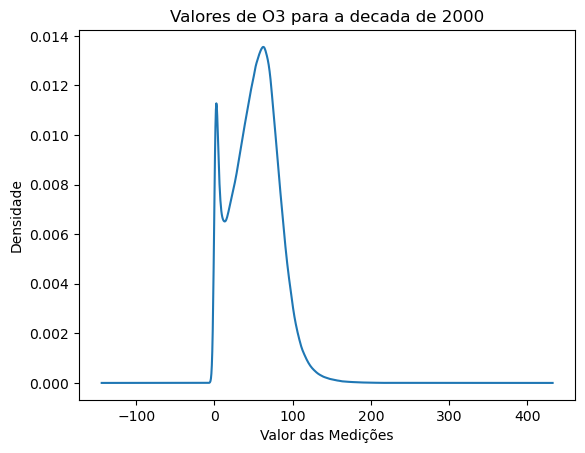

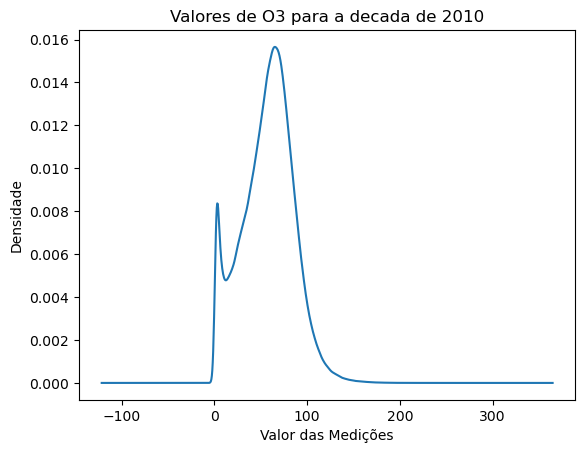

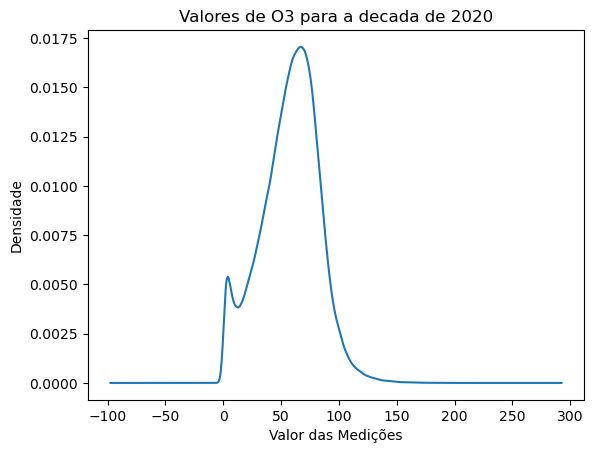

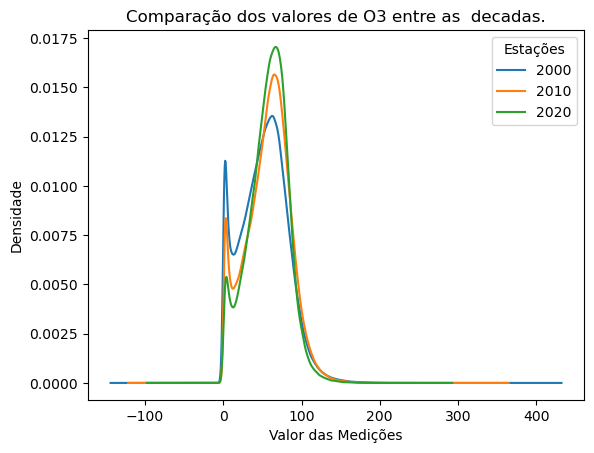

In [15]:
# KDE (ou histograma) dos valores das medições para um poluente, para comparar a distribuição das medições ao longo das várias decadas, num subconjunto de estações
decadas=[2000, 2010, 2020]
poluente='O3'
filtro_poluente = medicoes[medicoes['poluente'] == poluente].copy()
filtro_poluente = filtro_poluente.drop(['poluente', 'Ano', 'estacao'], axis=1)
filtro_poluente=filtro_poluente.copy()

for decada in decadas:
    Decada = filtro_poluente[filtro_poluente['Decada'] == decada]['valor']
    plt.figure()
    Decada.plot(kind='kde', title=f'Valores de O3 para a decada de {decada}')
    plt.xlabel('Valor das Medições')
    plt.ylabel('Densidade')
    plt.show()

for decada in decadas:
    Decada = filtro_poluente[filtro_poluente['Decada'] == decada]['valor']
    Decada.plot(kind='kde', title='Comparação dos valores de O3 entre as  decadas.', label=decada)    
    plt.xlabel('Valor das Medições')
    plt.ylabel('Densidade')
    plt.legend(title='Estações')

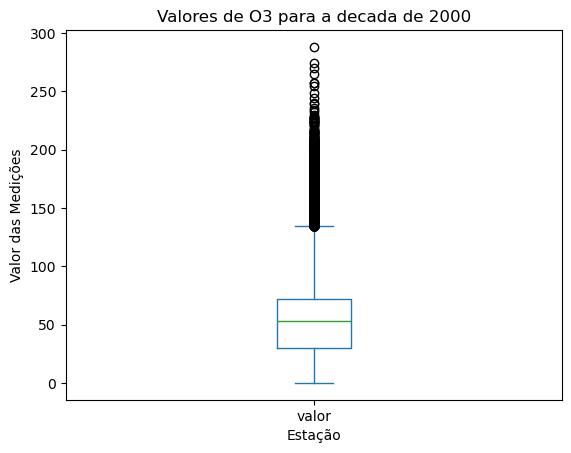

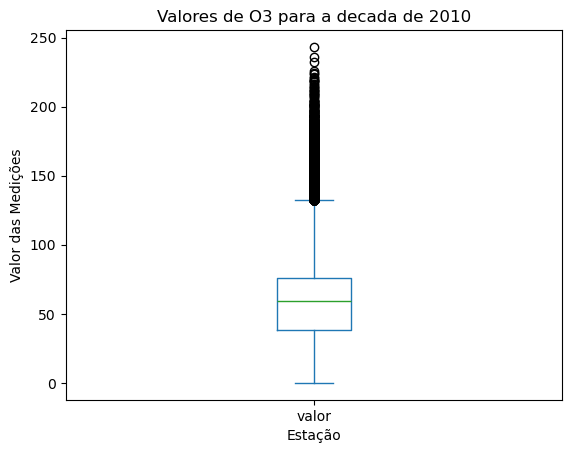

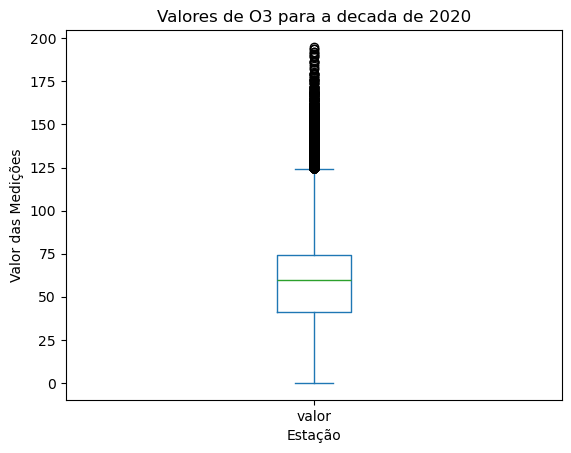

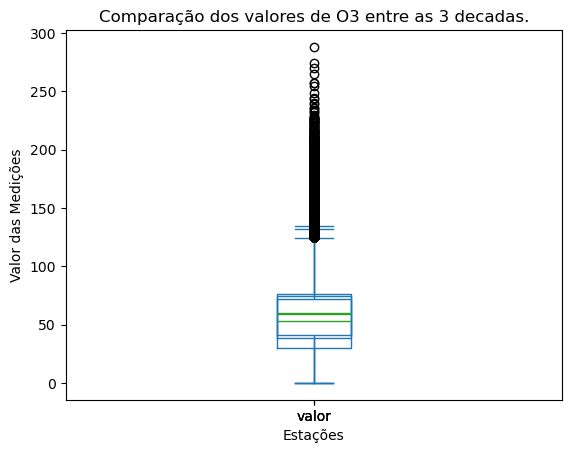

In [16]:
# Box Plot dos valores das medições para um poluente, para comparar a distribuição das medições ao longo das várias décadas, num subconjunto de estações
#medicoes[medicoes['poluente']=='O3'][['Decada','valor']].groupby('Decada').sum().plot(kind='box', title='Box plot da variação do valor de O3 por Decada')

decadas=[2000, 2010, 2020]
poluente='O3'
filtro_poluente = medicoes[medicoes['poluente'] == poluente].copy()
filtro_poluente = filtro_poluente.drop(['poluente', 'Ano', 'estacao'], axis=1)
filtro_poluente=filtro_poluente.copy()

for decada in decadas:
    Decada = filtro_poluente[filtro_poluente['Decada'] == decada]['valor']
    plt.figure()
    Decada.plot(kind='box', title=f'Valores de O3 para a decada de {decada}')
    plt.xlabel('Estação')
    plt.ylabel('Valor das Medições')
    plt.show()

for decada in decadas:
    Decada = filtro_poluente[filtro_poluente['Decada'] == decada]['valor']
    Decada.plot(kind='box', title='Comparação dos valores de O3 entre as 3 decadas.')    
    plt.xlabel('Estações')
    plt.ylabel('Valor das Medições')